In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df_thursday = df[df['Publication_Day'] == 'Thursday']
df_thursday.head(20)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761
10,10,Sports Central,Episode 66,106.41,Sports,84.29,Thursday,Evening,32.84,3.0,Positive,74.08016
15,15,Tech Talks,Episode 47,68.33,Technology,75.33,Thursday,Evening,92.90,0.0,Neutral,63.97718
17,17,Sport Spot,Episode 32,95.45,Sports,92.19,Thursday,Afternoon,70.29,2.0,Neutral,79.67749
38,38,Music Matters,Episode 32,86.84,Music,86.65,Thursday,Morning,28.27,1.0,Neutral,81.49839
40,40,Sports Central,Episode 77,69.66,Sports,57.32,Thursday,Evening,61.32,1.0,Neutral,50.05332
55,55,World Watch,Episode 6,34.32,News,20.33,Thursday,Morning,83.26,0.0,Negative,16.04940
57,57,Style Guide,Episode 23,107.61,Lifestyle,33.32,Thursday,Evening,96.94,0.0,Negative,77.01387


tiễn xử lý dữ liệu (em dùng nội suy)

In [ ]:
import pandas as pd

df_thursday = df[df['Publication_Day'] == 'Thursday'].copy()

print("Số lượng giá trị thiếu trước khi nội suy:")
print(df_thursday.isnull().sum())

df_thursday[df_thursday.select_dtypes(include=['number']).columns] = \
    df_thursday.select_dtypes(include=['number']) \
               .interpolate(method='linear', limit_direction='both')

print("\nSố lượng giá trị thiếu sau khi nội suy:")
print(df_thursday.isnull().sum())


Số lượng giá trị thiếu trước khi nội suy:
id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         12566
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    20443
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64

Số lượng giá trị thiếu sau khi nội suy:
id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64


In [23]:
df_thursday.columns.tolist()


['id',
 'Podcast_Name',
 'Episode_Title',
 'Episode_Length_minutes',
 'Genre',
 'Host_Popularity_percentage',
 'Publication_Day',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment',
 'Listening_Time_minutes']

In [25]:
ts = df_thursday['Listening_Time_minutes'].values

# Triển khai 03 mô hình phân tích chuỗi thời gian với Kalman

Kalman Filter 1D Evaluation:
MSE: 164.4348
RMSE: 12.8232
MAE: 10.4371
R²: 0.7876


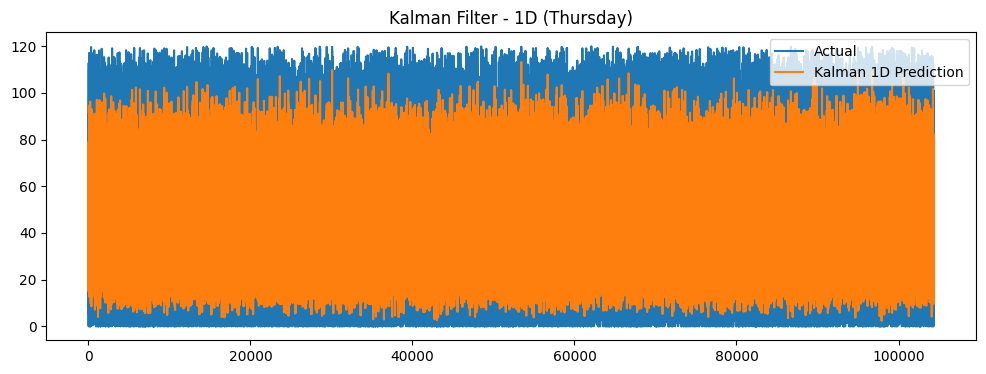


Kalman Regression Evaluation:
MSE: 410.1238
RMSE: 20.2515
MAE: 16.6921
R²: 0.4702


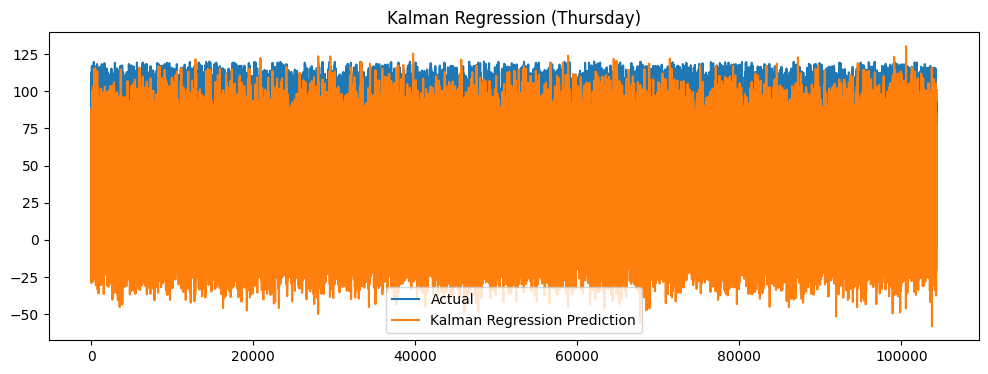


Kalman Multivariate Evaluation:
MSE: 2787.4065
RMSE: 52.7959
MAE: 44.8697
R²: -2.6008


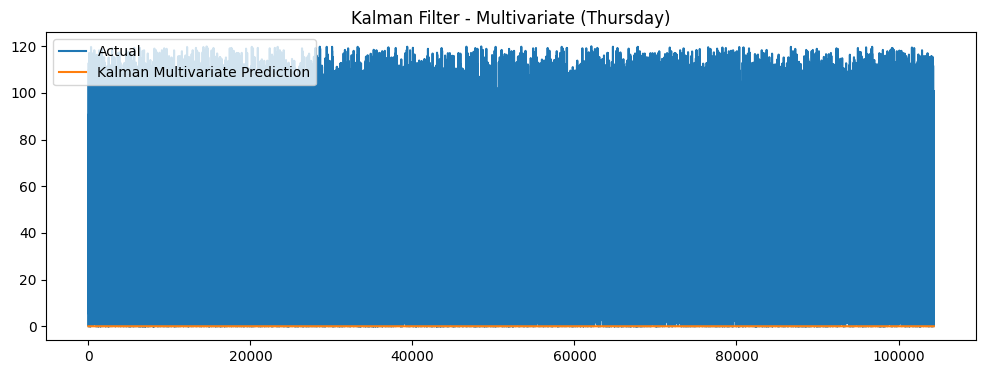

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pykalman import KalmanFilter

df = pd.read_csv('train.csv')
df_thursday = df[df['Publication_Day'] == 'Thursday'].copy()

# 
df_thursday[df_thursday.select_dtypes(include=['number']).columns] = \
    df_thursday.select_dtypes(include=['number']) \
               .interpolate(method='linear', limit_direction='both')

categorical_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Time', 'Episode_Sentiment']
for col in categorical_cols:
    df_thursday.loc[:, col] = LabelEncoder().fit_transform(df_thursday[col])


df_thursday.loc[:, 'Publication_Day'] = LabelEncoder().fit_transform(df_thursday['Publication_Day'])

features = ['Episode_Length_minutes', 'Host_Popularity_percentage',
            'Guest_Popularity_percentage', 'Number_of_Ads',
            'Podcast_Name', 'Episode_Title', 'Genre',
            'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

X = df_thursday[features].values
y = df_thursday['Listening_Time_minutes'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_features = X_scaled.shape[1]
n_timesteps = len(X_scaled)

# 1. Kalman Filter 1 chiều
kf_1d = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
state_means_1d, _ = kf_1d.filter(y)

# Đánh giá
mse_1d = mean_squared_error(y, state_means_1d.flatten())
rmse_1d = np.sqrt(mse_1d)
mae_1d = mean_absolute_error(y, state_means_1d.flatten())
r2_1d = r2_score(y, state_means_1d.flatten())

print("Kalman Filter 1D Evaluation:")
print(f"MSE: {mse_1d:.4f}")
print(f"RMSE: {rmse_1d:.4f}")
print(f"MAE: {mae_1d:.4f}")
print(f"R²: {r2_1d:.4f}")

# Trực quan hóa
plt.figure(figsize=(12, 4))
plt.plot(y, label='Actual')
plt.plot(state_means_1d.flatten(), label='Kalman 1D Prediction')
plt.title("Kalman Filter - 1D (Thursday)")
plt.legend()
plt.show()

# 2. Kalman Regression
kf_reg = KalmanFilter(
    transition_matrices=np.eye(n_features),
    transition_covariance=0.01 * np.eye(n_features),
    observation_covariance=0.5,
    initial_state_mean=np.zeros(n_features),
    initial_state_covariance=np.eye(n_features)
)

state_means = []
state_covariances = []

current_mean = kf_reg.initial_state_mean
current_cov = kf_reg.initial_state_covariance

for t in range(n_timesteps):
    obs_matrix = X_scaled[t].reshape(1, -1)
    obs = y[t]
    current_mean, current_cov = kf_reg.filter_update(
        current_mean, current_cov,
        observation=obs,
        observation_matrix=obs_matrix
    )
    state_means.append(current_mean)

state_means = np.array(state_means)
y_pred_reg = np.sum(X_scaled * state_means, axis=1)

# Đánh giá
mse_reg = mean_squared_error(y, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)
mae_reg = mean_absolute_error(y, y_pred_reg)
r2_reg = r2_score(y, y_pred_reg)

print("\nKalman Regression Evaluation:")
print(f"MSE: {mse_reg:.4f}")
print(f"RMSE: {rmse_reg:.4f}")
print(f"MAE: {mae_reg:.4f}")
print(f"R²: {r2_reg:.4f}")

# Trực quan hóa
plt.figure(figsize=(12, 4))
plt.plot(y, label='Actual')
plt.plot(y_pred_reg, label='Kalman Regression Prediction')
plt.title("Kalman Regression (Thursday)")
plt.legend()
plt.show()

# 3. Kalman Multivariate (H cố định)
H = np.mean(X_scaled, axis=0).reshape(1, -1)

kf_multi = KalmanFilter(
    transition_matrices=np.eye(n_features),
    observation_matrices=H,
    initial_state_mean=np.zeros(n_features),
    transition_covariance=0.01 * np.eye(n_features),
    observation_covariance=1.0
)

state_means_multi, _ = kf_multi.filter(y)
y_pred_multi = np.sum(X_scaled * state_means_multi, axis=1)

# Đánh giá
mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y, y_pred_multi)
r2_multi = r2_score(y, y_pred_multi)

print("\nKalman Multivariate Evaluation:")
print(f"MSE: {mse_multi:.4f}")
print(f"RMSE: {rmse_multi:.4f}")
print(f"MAE: {mae_multi:.4f}")
print(f"R²: {r2_multi:.4f}")

# Trực quan hóa
plt.figure(figsize=(12, 4))
plt.plot(y, label='Actual')
plt.plot(y_pred_multi, label='Kalman Multivariate Prediction')
plt.title("Kalman Filter - Multivariate (Thursday)")
plt.legend()
plt.show()
